In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krishnavyas26","key":"45b67fc6549d7faa1bd6af3daac0c6c7"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mahmoudima/mma-facial-expression


Dataset URL: https://www.kaggle.com/datasets/mahmoudima/mma-facial-expression
License(s): unknown
100% 166M/166M [00:09<00:00, 22.7MB/s]
100% 166M/166M [00:09<00:00, 18.1MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("mma-facial-expression.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/mma_facial_expression")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from itertools import chain
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load train and test datasets
train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)



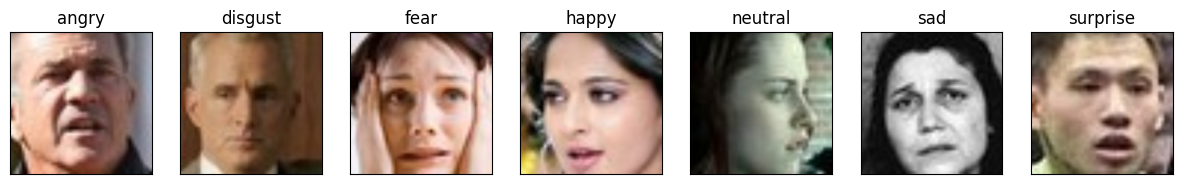

In [ ]:
import matplotlib.pyplot as plt

class_names = train_emotion.classes

fig = plt.figure(figsize=(15, 5))
num_classes = len(class_names)
for i in range(num_classes):
    ax = fig.add_subplot(1, num_classes, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img, label = next((img, label) for img, label in test_emotion if label == i)
    img = img.permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())
    plt.imshow(img)
plt.show()


In [ ]:
emotion_trans = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.4630, 0.4530, 0.3405], std = [0.2862, 0.2758, 0.2845])
])

In [ ]:
train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)


In [ ]:
from collections import Counter

train_class_counts = Counter([label for _, label in train_emotion.samples])
print("Number of images in each class (Train):")
for class_idx, count in train_class_counts.items():
    print(f"{class_names[class_idx]}: {count}")

test_class_counts = Counter([label for _, label in test_emotion.samples])
print("\nNumber of images in each class (Test):")
for class_idx, count in test_class_counts.items():
    print(f"{class_names[class_idx]}: {count}")

Number of images in each class (Train):
angry: 6566
disgust: 3231
fear: 4859
happy: 28592
neutral: 29384
sad: 12223
surprise: 8113

Number of images in each class (Test):
angry: 1041
disgust: 655
fear: 691
happy: 5459
neutral: 5858
sad: 2177
surprise: 1475


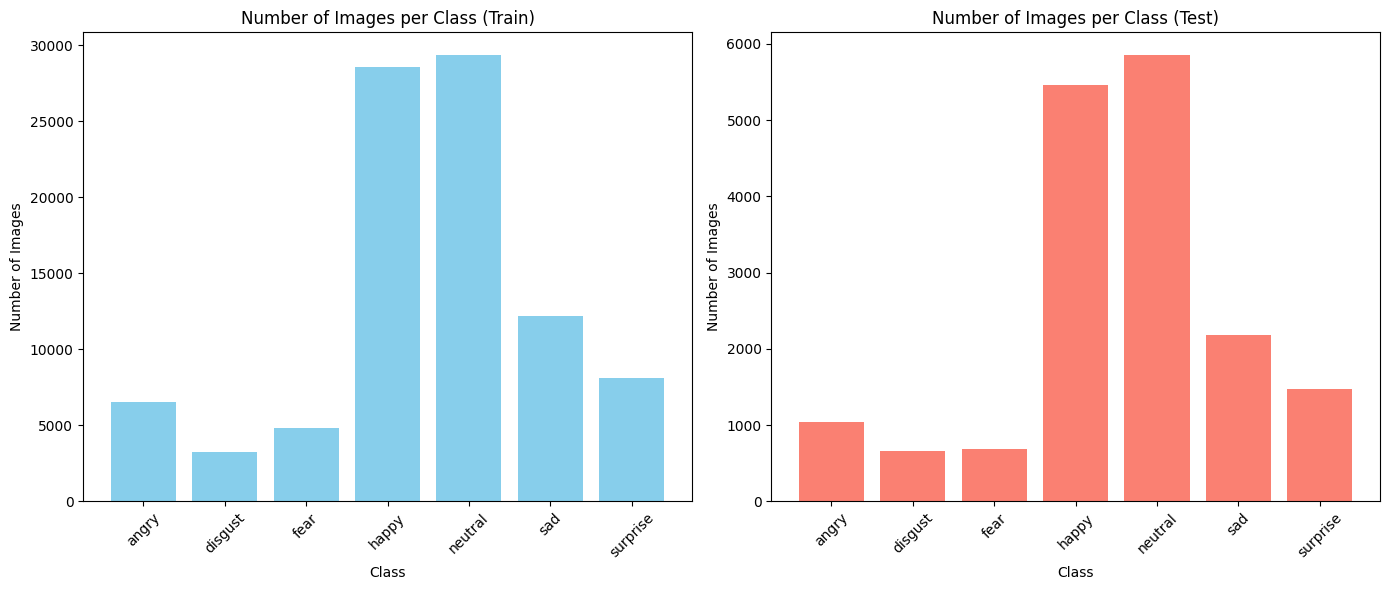

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

train_class_counts = Counter([label for _, label in train_emotion.samples])
train_counts = [train_class_counts[i] for i in range(len(class_names))]

test_class_counts = Counter([label for _, label in test_emotion.samples])
test_counts = [test_class_counts[i] for i in range(len(class_names))]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(class_names, train_counts, color='skyblue')
ax[0].set_title("Number of Images per Class (Train)")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Number of Images")
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(class_names, test_counts, color='salmon')
ax[1].set_title("Number of Images per Class (Test)")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Number of Images")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
mean = torch.zeros(3)
std = torch.zeros(3)

for img, _ in train_emotion:
    mean += img.mean(dim=(1, 2))
    std += img.std(dim=(1, 2))

mean /= len(train_emotion)
std /= len(train_emotion)

print(f"Mean: {mean}")
print(f"Std: {std}")




Mean: tensor([ 0.2214, -0.0247,  0.2498])
Std: tensor([0.7593, 0.7311, 0.6851])


In [ ]:
import os

base_path = '/content/mma_facial_expression/MMAFEDB'
for root, dirs, files in os.walk(base_path):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {len(files)}")
    print("-" * 50)


Root: /content/mma_facial_expression/MMAFEDB
Dirs: ['test', 'train', 'valid']
Files: 0
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test
Dirs: ['fear', 'surprise', 'happy', 'angry', 'disgust', 'neutral', 'sad']
Files: 0
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/fear
Dirs: []
Files: 691
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/surprise
Dirs: []
Files: 1475
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/happy
Dirs: []
Files: 5459
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/angry
Dirs: []
Files: 1041
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/disgust
Dirs: []
Files: 655
--------------------------------------------------
Root: /content/mma_facial_expression

In [ ]:
from PIL import Image, UnidentifiedImageError

for img_path, _ in train_emotion.samples:
    try:
        with Image.open(img_path) as img:
            img.verify()
    except UnidentifiedImageError:
        print(f"Corrupt image: {img_path}")


NO unidentifed images found

In [ ]:
from torch.utils.data import WeightedRandomSampler,DataLoader
import torch

class_counts = Counter(train_emotion.targets)
class_weights = [1.0 / class_counts[i] for i in range(len(train_emotion.classes))]
sample_weights = [class_weights[label] for _, label in train_emotion.samples]

sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_emotion, batch_size=32, sampler=sampler)


used weighted sampler method to improve data quality and remove bias

Class distribution after sampling:
surprise: 13349 samples
angry: 13246 samples
sad: 13372 samples
happy: 13308 samples
fear: 13108 samples
neutral: 13312 samples
disgust: 13273 samples


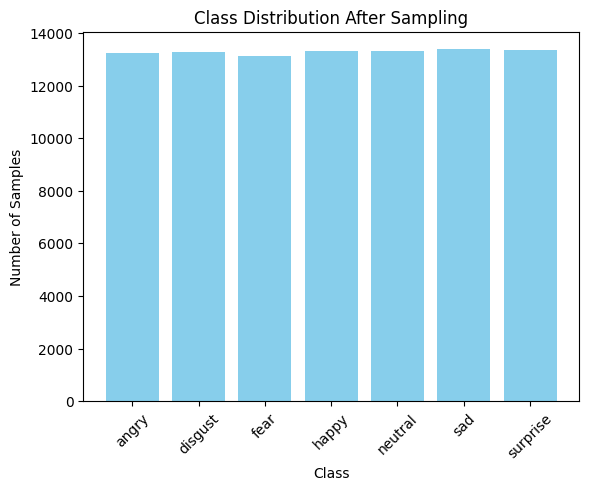

In [ ]:
from collections import Counter

sampled_indices = list(sampler)

sampled_labels = [train_emotion.targets[idx] for idx in sampled_indices]

sampled_class_counts = Counter(sampled_labels)

print("Class distribution after sampling:")
for class_idx, count in sampled_class_counts.items():
    print(f"{train_emotion.classes[class_idx]}: {count} samples")

import matplotlib.pyplot as plt

classes = [train_emotion.classes[idx] for idx in range(len(train_emotion.classes))]
class_sizes = [sampled_class_counts.get(idx, 0) for idx in range(len(train_emotion.classes))]

plt.bar(classes, class_sizes, color='skyblue')
plt.title("Class Distribution After Sampling")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()


In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(0, n_epochs):
        model.train()
        loss_train = 0.0
        for inputs, labels in train_loader:


            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 0 or epoch == n_epochs - 1 or epoch % 1 == 0:
            print('Epoch {}, Training loss {}'.format(epoch, loss_train / len(train_loader)))


In [ ]:
def test(model, train_loader, test_loader):
  model.eval()
  lls=[0,1,2,3,4,5,6,7,8,9]
  predict_train = []
  predict_test = []
  labels_train = []
  labels_test = []
  with torch.no_grad():
    for inputs, labels in train_loader:
      outputs = model(inputs)
      index_, predicted = torch.max(outputs, dim=1)
      predict_train.append(predicted.tolist())
      labels_train.append(labels.tolist())

    for inputs, labels in test_loader:
      outputs = model(inputs)
      index_, predicted = torch.max(outputs, dim=1)
      predict_test.append(predicted.tolist())
      labels_test.append(labels.tolist())

    print("Confusion matrix on train:\n",  confusion_matrix(list(chain(*labels_train)), list(chain(*predict_train)), labels=lls))
    print()
    print("Classification report on train:\n",  classification_report(list(chain(*labels_train)), list(chain(*predict_train)), labels=lls))
    print()
    print("Confusion matrix on test:\n", confusion_matrix(list(chain(*labels_test)), list(chain(*predict_test)), labels =lls))
    print()
    print("Classification report on test:\n",  classification_report(list(chain(*labels_test)), list(chain(*predict_test)), labels=lls))




In [ ]:
train_loader_emotion = torch.utils.data.DataLoader(train_emotion, batch_size=32, shuffle=True)
test_loader_emotion = torch.utils.data.DataLoader(test_emotion, batch_size=32, shuffle=False)


In [ ]:
class neural_network(nn.Module):
    def __init__(self,  in_size, hidden_size1,hidden_size2, out_size):
        super().__init__()
        self.network = nn.Sequential(
          nn.Linear(in_size, hidden_size1),
          nn.ReLU(),
          nn.Linear(hidden_size1, hidden_size2),
          nn.ReLU(),
          nn.Linear(hidden_size2, out_size))

    def forward(self, x):
        x_reshape=x.view(x.shape[0],-1)
        out = self.network(x_reshape)
        return out.squeeze()

In [ ]:
torch.manual_seed(0)
model = neural_network(3*224*224, 128, 64, 10)
optimizer = optim.Adam(model.parameters(), lr =0.0001)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 5, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader_emotion)

Epoch 0, Training loss 1.5933616634737764
Epoch 1, Training loss 1.4795812285118732
Epoch 2, Training loss 1.4233126400547527
Epoch 3, Training loss 1.3842307486701488
Epoch 4, Training loss 1.3488616626671242


In [ ]:
test(model, train_loader_emotion, test_loader_emotion)

Confusion matrix on train:
 [[  889     1   396  1475  2821   669   315     0     0     0]
 [   30    47    63   669  2147   158   117     0     0     0]
 [  221     3  1072   915  1225   858   565     0     0     0]
 [  180     1   256 19255  7709   840   351     0     0     0]
 [  254     1   287  4577 22657  1064   544     0     0     0]
 [  245     2   388  2165  6601  2491   331     0     0     0]
 [  104     2   364  1429  2945   452  2817     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.46      0.14      0.21      6566
           1       0.82      0.01      0.03      3231
           2       0.38      0.22      0.28      4859
           3       0.63      0.67      0.65     28592
           4       0.49      0.77   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

### Parameter Tuning

In [ ]:
class neural_network(nn.Module):
    def __init__(self,  in_size, hidden_size1, out_size):
        super().__init__()
        self.network = nn.Sequential(
          nn.Linear(in_size, hidden_size1),
          nn.ReLU(),

          nn.Linear(hidden_size1, out_size))

    def forward(self, x):
        x_reshape=x.view(x.shape[0],-1)
        out = self.network(x_reshape)
        return out.squeeze()

In [ ]:
torch.manual_seed(0)
model = neural_network(3*224*224, 128, 10)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 5, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader_emotion)
test(model, train_loader_emotion, test_loader_emotion)

Epoch 0, Training loss 2.526551267523152
Epoch 1, Training loss 1.993174622367352
Epoch 2, Training loss 2.335513511650823
Epoch 3, Training loss 2.2587203492153454
Epoch 4, Training loss 2.303511165538822
Confusion matrix on train:
 [[   51   203    83   998  4306    77   848     0     0     0]
 [   17    42    11   454  2549    13   145     0     0     0]
 [   21   109    94   483  2924    61  1167     0     0     0]
 [   92   380   131 12587 14351   130   921     0     0     0]
 [  177   575    77  3568 23801   188   998     0     0     0]
 [   84   297    70  1721  9099   153   799     0     0     0]
 [   23    79    55   761  4460    31  2704     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Classification report on train:
               precision    recall  f1-score   support

           0       0.11      0.01      0.01      6566
           1       0.02      0.01      0.02      3231
           2       0.18      0.02      0.03      4859
           3       0.61      0.44      0.51     28592
           4       0.39      0.81      0.52     29384
           5       0.23      0.01      0.02     12223
           6       0.36      0.33      0.34      8113
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.42     92968
   macro avg       0.19      0.16      0.15     92968
weighted avg       0.39      0.42      0.36     92968


Confusion matrix on test:
 [[   6   33    9  204  651    2  136    0    0    0]
 [   2   17    0  100  503    2   31    0    0    0]
 [   3   14   15   79  423    9  148    0    0    0]
 [  21  104   19 1248

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [ ]:
class neural_network(nn.Module):
    def __init__(self,  in_size, hidden_size1,hidden_size2, hidden_size3, out_size):
        super().__init__()
        self.network = nn.Sequential(
          nn.Linear(in_size, hidden_size1),
          nn.ReLU(),
          nn.Linear(hidden_size1, hidden_size2),
          nn.ReLU(),
          nn.Linear(hidden_size2, hidden_size3),
          nn.ReLU(),
          nn.Linear(hidden_size3, out_size))

    def forward(self, x):
        x_reshape=x.view(x.shape[0],-1)
        out = self.network(x_reshape)
        return out.squeeze()

In [ ]:
torch.manual_seed(0)
model = neural_network(3*224*224, 128, 64, 32, 10)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 5, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader_emotion)
test(model, train_loader_emotion, test_loader_emotion)
test(model, train_loader_emotion, test_loader_emotion)

Epoch 0, Training loss 1.5637398012449064
Epoch 1, Training loss 1.4635654481131704
Epoch 2, Training loss 1.4330628550389022
Epoch 3, Training loss 1.4074172555210667
Epoch 4, Training loss 1.3853518691911257
Confusion matrix on train:
 [[  503     0   373  1988  3002   187   513     0     0     0]
 [   22     0    50   667  2294    18   180     0     0     0]
 [  349     0   442  1507  1483   176   902     0     0     0]
 [  226     0   147 19624  8016    99   480     0     0     0]
 [  222     0   197  4569 22944   155  1297     0     0     0]
 [  486     0   282  3105  7442   272   636     0     0     0]
 [   85     0   268  1417  3041    35  3267     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.27      0.08      0.1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Confusion matrix on test:
 [[  49    0   51  331  483   23  104    0    0    0]
 [   9    0   12  104  477    5   48    0    0    0]
 [  41    0   58  208  231   27  126    0    0    0]
 [  44    0   28 1978 3277   20  112    0    0    0]
 [  36    0   33  897 4592   22  278    0    0    0]
 [  59    0   41  490 1365   28  194    0    0    0]
 [  18    0   38  270  700    8  441    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on test:
               precision    recall  f1-score   support

           0       0.19      0.05      0.08      1041
           1       0.00      0.00      0.00       655
           2       0.22      0.08      0.12       691
           3       0.46      0.36      0.41      5459
           4       0.41      0.78      0.54      5858
           5       0.21      0.01      0.02      2177
           6       0.34      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

# Learning rates

In [ ]:
class neural_network(nn.Module):
    def __init__(self,  in_size, hidden_size1,hidden_size2, out_size):
        super().__init__()
        self.network = nn.Sequential(
          nn.Linear(in_size, hidden_size1),
          nn.ReLU(),
          nn.Linear(hidden_size1, hidden_size2),
          nn.ReLU(),
          nn.Linear(hidden_size2, out_size))

    def forward(self, x):
        x_reshape=x.view(x.shape[0],-1)
        out = self.network(x_reshape)
        return out.squeeze()

In [ ]:
learning_rates = [0.001, 0.0005, 0.0001, 0.01, 0.005, 0.0015]
best_lr = learning_rates[0]
best_accuracy = 0

for lr in learning_rates:
      torch.manual_seed(0)
      model = neural_network(3*224*224, 128, 64, 10)
      optimizer = optim.Adam(model.parameters(), lr=lr)
      loss_fn = nn.CrossEntropyLoss()

      training_loop(n_epochs = 5, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader_emotion)
      test(model, train_loader_emotion, test_loader_emotion)

Epoch 0, Training loss 1.732693869946172
Epoch 1, Training loss 1.5270296413982152
Epoch 2, Training loss 1.4901236827342328
Epoch 3, Training loss 1.471781296333771
Epoch 4, Training loss 1.4495527084047681
Confusion matrix on train:
 [[    1     0   232  1631  4218     0   484     0     0     0]
 [    0     0    36   724  2335     0   136     0     0     0]
 [    0     0   303  1208  2576     0   772     0     0     0]
 [    0     0   146 18868  9197     0   381     0     0     0]
 [    0     0   301  4857 23583     1   642     0     0     0]
 [    0     0   253  2303  9191     0   476     0     0     0]
 [    0     0   290  1403  3783     0  2637     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Classification report on train:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      6566
           1       0.00      0.00      0.00      3231
           2       0.19      0.06      0.09      4859
           3       0.61      0.66      0.63     28592
           4       0.43      0.80      0.56     29384
           5       0.00      0.00      0.00     12223
           6       0.48      0.33      0.39      8113
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.49     92968
   macro avg       0.27      0.19      0.17     92968
weighted avg       0.45      0.49      0.41     92968


Confusion matrix on test:
 [[   0    0   36  296  604    0  105    0    0    0]
 [   0    0    6  124  494    0   31    0    0    0]
 [   0    0   46  159  382    0  104    0    0    0]
 [   0    0   24 1935

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Confusion matrix on test:
 [[   0    0  103  282  516   80   60    0    0    0]
 [   0    0   21  112  491    8   23    0    0    0]
 [   0    0  136  154  302   47   52    0    0    0]
 [   0    0   64 1798 3480   66   51    0    0    0]
 [   0    0   84  695 4908   66  105    0    0    0]
 [   0    0   92  383 1502  103   97    0    0    0]
 [   0    0  192  269  776   20  218    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on test:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1041
           1       0.00      0.00      0.00       655
           2       0.20      0.20      0.20       691
           3       0.49      0.33      0.39      5459
           4       0.41      0.84      0.55      5858
           5       0.26      0.05      0.08      2177
           6       0.36      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Classification report on train:
               precision    recall  f1-score   support

           0       0.42      0.07      0.12      6566
           1       0.59      0.01      0.01      3231
           2       0.28      0.26      0.27      4859
           3       0.59      0.70      0.64     28592
           4       0.50      0.70      0.58     29384
           5       0.32      0.18      0.23     12223
           6       0.49      0.32      0.39      8113
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.51     92968
   macro avg       0.32      0.22      0.22     92968
weighted avg       0.49      0.51      0.47     92968


Confusion matrix on test:
 [[  51    1  105  327  359  107   91    0    0    0]
 [   9    0   17  166  393   33   37    0    0    0]
 [  18    0  139  154  188  105   87    0    0    0]
 [  18    0   59 2187

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Epoch 0, Training loss 2.1695733717286987
Epoch 1, Training loss 1.6669051093802483
Epoch 2, Training loss 1.6656781483008298
Epoch 3, Training loss 1.6655027270727296
Epoch 4, Training loss 1.665415028990833
Confusion matrix on train:
 [[    0     0     0  6566     0     0     0     0     0     0]
 [    0     0     0  3231     0     0     0     0     0     0]
 [    0     0     0  4859     0     0     0     0     0     0]
 [    0     0     0 28592     0     0     0     0     0     0]
 [    0     0     0 29384     0     0     0     0     0     0]
 [    0     0     0 12223     0     0     0     0     0     0]
 [    0     0     0  8113     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Classification report on train:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6566
           1       0.00      0.00      0.00      3231
           2       0.00      0.00      0.00      4859
           3       0.31      1.00      0.47     28592
           4       0.00      0.00      0.00     29384
           5       0.00      0.00      0.00     12223
           6       0.00      0.00      0.00      8113
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.31     92968
   macro avg       0.03      0.10      0.05     92968
weighted avg       0.09      0.31      0.14     92968


Confusion matrix on test:
 [[   0    0    0 1041    0    0    0    0    0    0]
 [   0    0    0  655    0    0    0    0    0    0]
 [   0    0    0  691    0    0    0    0    0    0]
 [   0    0    0 5459

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Epoch 0, Training loss 2.00526744344689


# Hidden layer

In [ ]:
hidden_layer_configs = [(32, 16),(64, 32), (128, 64), (256, 128)]
best_hidden_layers = hidden_layer_configs[0]

for hidden_sizes in hidden_layer_configs:
      torch.manual_seed(0)
      model = neural_network(3*224*224, hidden_sizes[0], hidden_sizes[1], 10)
      optimizer = optim.Adam(model.parameters(), lr=0.0001)
      loss_fn = nn.CrossEntropyLoss()

      training_loop(n_epochs = 5, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader_emotion)
      print(f"Hidden Layers: {hidden_sizes}")
      test(model, train_loader_emotion, test_loader_emotion)


Epoch 0, Training loss 1.6599162054406473
Epoch 1, Training loss 1.5311073280578635
Epoch 2, Training loss 1.4869314906971256
Epoch 3, Training loss 1.4595781069784761
Epoch 4, Training loss 1.4389989403552708
Hidden Layers: (32, 16)
Confusion matrix on train:
 [[  482     1   327  1861  2455  1004   435     1     0     0]
 [   39     3    38   790  2105   138   118     0     0     0]
 [  283     0   353  1123  1374   898   827     1     0     0]
 [  179     1   163 19039  7550  1041   617     1     1     0]
 [  217     2   165  6127 20636  1368   868     1     0     0]
 [  226     0   196  3064  6219  1933   582     1     2     0]
 [   53     0   218  1595  3217   327  2703     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Classification report on train:
               precision    recall  f1-score   support

           0       0.33      0.07      0.12      6566
           1       0.43      0.00      0.00      3231
           2       0.24      0.07      0.11      4859
           3       0.57      0.67      0.61     28592
           4       0.47      0.70      0.57     29384
           5       0.29      0.16      0.20     12223
           6       0.44      0.33      0.38      8113
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.49     92968
   macro avg       0.28      0.20      0.20     92968
weighted avg       0.45      0.49      0.44     92968


Confusion matrix on test:
 [[  52    0   38  334  395  134   88    0    0    0]
 [   9    0    2  151  430   23   40    0    0    0]
 [  39    0   41  169  231  108  103    0    0    0]
 [  37    1   14 2191

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Classification report on train:
               precision    recall  f1-score   support

           0       0.29      0.14      0.19      6566
           1       0.21      0.00      0.01      3231
           2       0.27      0.11      0.15      4859
           3       0.62      0.61      0.62     28592
           4       0.46      0.77      0.58     29384
           5       0.29      0.10      0.15     12223
           6       0.44      0.35      0.39      8113
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.49     92968
   macro avg       0.26      0.21      0.21     92968
weighted avg       0.46      0.49      0.45     92968


Confusion matrix on test:
 [[ 102    0   48  267  432   87  105    0    0    0]
 [  22    0    4  103  458   28   40    0    0    0]
 [  78    2   52  137  244   61  117    0    0    0]
 [  73    4   45 1906

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Classification report on train:
               precision    recall  f1-score   support

           0       0.42      0.07      0.12      6566
           1       0.59      0.01      0.01      3231
           2       0.28      0.26      0.27      4859
           3       0.59      0.70      0.64     28592
           4       0.50      0.70      0.58     29384
           5       0.32      0.18      0.23     12223
           6       0.49      0.32      0.39      8113
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.51     92968
   macro avg       0.32      0.22      0.22     92968
weighted avg       0.49      0.51      0.47     92968


Confusion matrix on test:
 [[  51    1  105  327  359  107   91    0    0    0]
 [   9    0   17  166  393   33   37    0    0    0]
 [  18    0  139  154  188  105   87    0    0    0]
 [  18    0   59 2187

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

# Batch Size

In [ ]:
batch_sizes = [16, 32, 64, 128]


for batch_size in batch_sizes:
      train_loader_emotion = torch.utils.data.DataLoader(train_emotion, batch_size=batch_size, shuffle=True)
      test_loader_emotion = torch.utils.data.DataLoader(test_emotion, batch_size=batch_size, shuffle=False)
      torch.manual_seed(0)
      model = neural_network(3*224*224, 256, 128, 10)
      optimizer = optim.Adam(model.parameters(), lr=0.0001)
      loss_fn = nn.CrossEntropyLoss()
      print(f"Batch Size: {batch_size}")
      training_loop(n_epochs = 5, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader_emotion)
      test(model, train_loader_emotion, test_loader_emotion)

Batch Size: 16
Epoch 0, Training loss 1.606551415219485
Epoch 1, Training loss 1.4612583561416255


KeyboardInterrupt: 

### used subset sampling to improve

In [ ]:
from torch.utils.data import Subset
import random

train_percentage = 0.1
test_percentage = 0.1

train_size = int(len(train_emotion) * train_percentage)
test_size = int(len(test_emotion) * test_percentage)

random.seed(0)
train_indices = random.sample(range(len(train_emotion)), train_size)
test_indices = random.sample(range(len(test_emotion)), test_size)

train_subset = Subset(train_emotion, train_indices)
test_subset = Subset(test_emotion, test_indices)

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    train_loader_emotion = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader_emotion = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=False)

    torch.manual_seed(0)
    model = neural_network(3*224*224, 256, 128, 10)
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    loss_fn = nn.CrossEntropyLoss()

    print(f"Batch Size: {batch_size}")
    training_loop(n_epochs=5, optimizer=optimizer, model=model, loss_fn=loss_fn, train_loader=train_loader_emotion)

    test(model, train_loader_emotion, test_loader_emotion)


Batch Size: 16
Epoch 0, Training loss 1.9790750635265277
Epoch 1, Training loss 1.6343981189694954
Epoch 2, Training loss 1.513485755341804
Epoch 3, Training loss 1.4201434983033527
Epoch 4, Training loss 1.331271928477
Confusion matrix on train:
 [[ 275    1   26  193  133   23   36    0    0    0]
 [  14   28    2   84  104   13   23    0    0    0]
 [  77    0  138  164   50   21   48    0    0    0]
 [  52    0   12 2159  572   54   44    0    0    0]
 [ 104    5   16  678 1909   82  104    0    0    0]
 [  56    5   29  351  398  340   60    0    0    0]
 [  65    2    9  207  185   22  323    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.43      0.40      0.41       687
           1       0.68      0.10      0.18       268
           2       0.59 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Batch Size: 32
Epoch 0, Training loss 1.8553277004215725
Epoch 1, Training loss 1.5930853430757816
Epoch 2, Training loss 1.491179771439726
Epoch 3, Training loss 1.382458824472329
Epoch 4, Training loss 1.2969735717445714
Confusion matrix on train:
 [[ 317    1   50  137  101   46   35    0    0    0]
 [  19   46    5   86   82   19   11    0    0    0]
 [  57    1  222  108   47   33   30    0    0    0]
 [  85    4   63 2131  472   96   42    0    0    0]
 [ 178   11   68  654 1771  113  103    0    0    0]
 [  83    7   49  296  296  464   44    0    0    0]
 [  70    4   55  169  130   38  347    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.39      0.46      0.42       687
           1       0.62      0.17      0.27       268
           2       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Batch Size: 64
Epoch 0, Training loss 1.83510481576397
Epoch 1, Training loss 1.5738730414272988
Epoch 2, Training loss 1.4620056919855615
Epoch 3, Training loss 1.3426457921119586
Epoch 4, Training loss 1.2685262830290076
Confusion matrix on train:
 [[ 289    1   73   96  102   26  100    0    0    0]
 [  11   28    9   83  100   16   21    0    0    0]
 [  36    0  254   55   48   28   77    0    0    0]
 [  53    1   76 2099  449   60  155    0    0    0]
 [  81    4   66  473 1960   98  216    0    0    0]
 [  60    3   69  222  324  444  117    0    0    0]
 [  27    1   34  118  121   25  487    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.52      0.42      0.46       687
           1       0.74      0.10      0.18       268
           2       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Batch Size: 128
Epoch 0, Training loss 1.764029373861339
Epoch 1, Training loss 1.5304624985342157
Epoch 2, Training loss 1.4172620038463646
Epoch 3, Training loss 1.332241847090525
Epoch 4, Training loss 1.232279656684562
Confusion matrix on train:
 [[ 326    2   26  110  131   27   65    0    0    0]
 [  14   34    2   86  101   16   15    0    0    0]
 [  42    0  214   90   58   22   72    0    0    0]
 [  63    3   41 2032  605   59   90    0    0    0]
 [  91    6   35  486 2076   57  147    0    0    0]
 [  56    5   47  245  389  410   87    0    0    0]
 [  43    0   20  136  160   31  423    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49       687
           1       0.68      0.13      0.21       268
           2       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [ ]:
train_loader_emotion = torch.utils.data.DataLoader(train_subset, batch_size=128, shuffle=True)
test_loader_emotion = torch.utils.data.DataLoader(test_subset, batch_size=128, shuffle=False)

# Optimizer

# SGD

In [ ]:
      torch.manual_seed(0)
      model = neural_network(3*224*224, 128, 64, 10)
      optimizer = optim.SGD(model.parameters(), lr=0.0001)
      loss_fn = nn.CrossEntropyLoss()

      training_loop(n_epochs = 5, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader_emotion)
      test(model, train_loader_emotion, test_loader_emotion,)

Epoch 0, Training loss 1.8498087731707284
Epoch 1, Training loss 1.615302811551734
Epoch 2, Training loss 1.5492053280513367
Epoch 3, Training loss 1.5160460451596045
Epoch 4, Training loss 1.4959436020847854
Confusion matrix on train:
 [[  112     0   381  2384  2841   445   403     0     0     0]
 [    7     0    66  1078  1895    88    97     0     0     0]
 [   66     0   543  1677  1529   451   593     0     0     0]
 [   60     0   269 19068  8330   511   354     0     0     0]
 [   64     0   362  7892 19963   529   574     0     0     0]
 [   63     0   383  3798  6753   863   363     0     0     0]
 [   16     0   335  2349  3217   267  1929     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Classification report on train:
               precision    recall  f1-score   support

           0       0.29      0.02      0.03      6566
           1       0.00      0.00      0.00      3231
           2       0.23      0.11      0.15      4859
           3       0.50      0.67      0.57     28592
           4       0.45      0.68      0.54     29384
           5       0.27      0.07      0.11     12223
           6       0.45      0.24      0.31      8113
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.46     92968
   macro avg       0.22      0.18      0.17     92968
weighted avg       0.40      0.46      0.40     92968


Confusion matrix on test:
 [[  13    0   48  439  401   60   80    0    0    0]
 [   3    0    8  195  414   13   22    0    0    0]
 [   6    0   74  222  246   62   81    0    0    0]
 [   9    0   46 2405

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Adam

In [ ]:
torch.manual_seed(0)
model = neural_network(3*224*224, 128, 64, 10)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 5, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader_emotion)
test(model, train_loader_emotion, test_loader_emotion)

Epoch 0, Training loss 1.7661257231072203
Epoch 1, Training loss 1.579719404651694
Epoch 2, Training loss 1.4556684281728038
Epoch 3, Training loss 1.3739758076733106
Epoch 4, Training loss 1.2822901973985645
Confusion matrix on train:
 [[ 183    0   39  177  212   39   37    0    0    0]
 [   5   29    3   84  121   17    9    0    0    0]
 [  23    0  149  124  122   35   45    0    0    0]
 [  40    5   25 2200  517   73   33    0    0    0]
 [  48    5   21  566 2140   72   46    0    0    0]
 [  44    4   34  306  433  387   31    0    0    0]
 [  25    7   15  194  254   39  279    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.50      0.27      0.35       687
           1       0.58      0.11      0.18       268
           2       0.52      0.30  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Activation fucntion

In [ ]:
activation_functions = [nn.ReLU(), nn.Tanh(), nn.Sigmoid()]
for activation_fn in activation_functions:

    class neural_network(nn.Module):
        def __init__(self,  in_size, hidden_size1,hidden_size2, out_size):
          super().__init__()
          self.network = nn.Sequential(
            nn.Linear(in_size, hidden_size1),
            activation_fn,
            nn.Linear(hidden_size1, hidden_size2),
            activation_fn,
            nn.Linear(hidden_size2, out_size))

        def forward(self, x):
            x_reshape=x.view(x.shape[0],-1)
            out = self.network(x_reshape)
            return out.squeeze()

    torch.manual_seed(0)
    model = neural_network(3*224*224, 128, 64, 10)
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    loss_fn = nn.CrossEntropyLoss()
    print(f"Activation Function: {activation_fn}")
    training_loop(n_epochs = 5, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader_emotion)
    test(model, train_loader_emotion, test_loader_emotion,)

Activation Function: ReLU()
Epoch 0, Training loss 1.7661257231072203
Epoch 1, Training loss 1.579719404651694
Epoch 2, Training loss 1.4556684281728038
Epoch 3, Training loss 1.3739758076733106
Epoch 4, Training loss 1.2822901973985645
Confusion matrix on train:
 [[ 183    0   39  177  212   39   37    0    0    0]
 [   5   29    3   84  121   17    9    0    0    0]
 [  23    0  149  124  122   35   45    0    0    0]
 [  40    5   25 2200  517   73   33    0    0    0]
 [  48    5   21  566 2140   72   46    0    0    0]
 [  44    4   34  306  433  387   31    0    0    0]
 [  25    7   15  194  254   39  279    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.50      0.27      0.35       687
           1       0.58      0.11      0.18       268
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Activation Function: Tanh()
Epoch 0, Training loss 1.821050812120307
Epoch 1, Training loss 1.6631249483317545
Epoch 2, Training loss 1.6122175536743582
Epoch 3, Training loss 1.5841700197899178
Epoch 4, Training loss 1.5664752248215348
Confusion matrix on train:
 [[  25    0   11  298  297   52    2    0    1    1]
 [   2    1    3   86  169    5    2    0    0    0]
 [  11    0   12  230  197   44    4    0    0    0]
 [   9    0    7 1935  907   32    2    0    1    0]
 [  15    1    4  836 1997   39    6    0    0    0]
 [   7    1    5  433  726   65    0    0    1    1]
 [  14    0    8  254  497   22   17    0    1    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.30      0.04      0.06       687
           1       0.33      0.00      0.01       268
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Activation Function: Sigmoid()
Epoch 0, Training loss 2.199957351162009
Epoch 1, Training loss 1.9589552846673417
Epoch 2, Training loss 1.8225283247150788
Epoch 3, Training loss 1.7437544603870339
Epoch 4, Training loss 1.69592557704612
Confusion matrix on train:
 [[   0    0    0  308  379    0    0    0    0    0]
 [   0    0    0   62  206    0    0    0    0    0]
 [   0    0    0  265  233    0    0    0    0    0]
 [   0    0    0 1563 1330    0    0    0    0    0]
 [   0    0    0  571 2327    0    0    0    0    0]
 [   0    0    0  371  868    0    0    0    0    0]
 [   0    0    0  246  567    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       687
           1       0.00      0.00      0.00       268
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [ ]:
import random

batch_sizes = [16, 32, 64, 128]
learning_rates = [0.1, 0.01, 0.001, 0.0001]
hidden_layer_configs = [256, 128, 64]
activation_functions = [nn.ReLU(), nn.Tanh(), nn.Sigmoid()]
layers_no = [1, 2, 3]
optimizers = [('Adam', optim.Adam), ('SGD', optim.SGD), ('RMSprop', optim.RMSprop)]
n_iterations = 16
best_accuracy = 0
best_params = {}

for i in range(n_iterations):
    batch_size = random.choice(batch_sizes)
    learning_rate = random.choice(learning_rates)
    hidden_sizes = random.choice(hidden_layer_configs)
    activation_fn = random.choice(activation_functions)
    layers = random.choice(layers_no)

    optimizer_name, optimizer_class = random.choice(optimizers)

    if layers == 3:
        class neural_network(nn.Module):
            def __init__(self, in_size, hidden_size1, out_size, activation_fn):
                super().__init__()
                self.network = nn.Sequential(
                    nn.Linear(in_size, hidden_size1),
                    activation_fn,
                    nn.Linear(hidden_size1, hidden_size1 // 2),
                    activation_fn,
                    nn.Linear(hidden_size1 // 2, (hidden_size1 // 2) // 2),
                    activation_fn,
                    nn.Linear((hidden_size1 // 2) // 2, out_size)
                )

            def forward(self, x):
                x_reshape = x.view(x.shape[0], -1)
                out = self.network(x_reshape)
                return out.squeeze()

    elif layers == 2:
        class neural_network(nn.Module):
            def __init__(self, in_size, hidden_size1, out_size, activation_fn):
                super().__init__()
                self.network = nn.Sequential(
                    nn.Linear(in_size, hidden_size1),
                    activation_fn,
                    nn.Linear(hidden_size1, hidden_size1 // 2),
                    activation_fn,
                    nn.Linear(hidden_size1 // 2, out_size)
                )

            def forward(self, x):
                x_reshape = x.view(x.shape[0], -1)
                out = self.network(x_reshape)
                return out.squeeze()
    else:
        class neural_network(nn.Module):
            def __init__(self, in_size, hidden_size1, out_size, activation_fn):
                super().__init__()
                self.network = nn.Sequential(
                    nn.Linear(in_size, hidden_size1),
                    activation_fn,
                    nn.Linear(hidden_size1, out_size)
                )

            def forward(self, x):
                x_reshape = x.view(x.shape[0], -1)
                out = self.network(x_reshape)
                return out.squeeze()
    train_loader_emotion = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader_emotion = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=False)

    torch.manual_seed(0)
    model = neural_network(3 * 224 * 224, hidden_sizes, 10, activation_fn)

    optimizer = optimizer_class(model.parameters(), lr=learning_rate)

    loss_fn = nn.CrossEntropyLoss()

    print(f"\nIteration {i+1}")
    print(f"Optimizer: {optimizer_name}")
    print(f"Batch Size: {batch_size}, Learning Rate: {learning_rate}, Layers: {layers}, Hidden Layers: {hidden_sizes}, Activation Function: {activation_fn}")

    training_loop(n_epochs=5, optimizer=optimizer, model=model, loss_fn=loss_fn, train_loader=train_loader_emotion)
    test(model, train_loader_emotion, test_loader_emotion)


Iteration 1
Optimizer: SGD
Batch Size: 128, Learning Rate: 0.001, Layers: 2, Hidden Layers: 256, Activation Function: Tanh()
Epoch 0, Training loss 1.8445435223514086
Epoch 1, Training loss 1.676801965661245
Epoch 2, Training loss 1.6235390215703887
Epoch 3, Training loss 1.5883069887553176
Epoch 4, Training loss 1.5628563508595505
Confusion matrix on train:
 [[  28    0    7  314  250   50   36    0    2    0]
 [   1    0    2  118  136    9    2    0    0    0]
 [  15    0   18  236  141   45   43    0    0    0]
 [  14    0   15 2016  794   35   19    0    0    0]
 [  13    2   13  995 1796   35   42    2    0    0]
 [  11    1   11  504  612   90   10    0    0    0]
 [   9    1    4  337  307   18  137    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 2
Optimizer: SGD
Batch Size: 128, Learning Rate: 0.1, Layers: 1, Hidden Layers: 128, Activation Function: Tanh()
Epoch 0, Training loss 1.7104404119596088
Epoch 1, Training loss 1.5858461285290653
Epoch 2, Training loss 1.555816795727978
Epoch 3, Training loss 1.5343473904753384
Epoch 4, Training loss 1.5292245721163815
Confusion matrix on train:
 [[  55    0   18  248  277   20   67    0    2    0]
 [   5    1    3   74  169    5   11    0    0    0]
 [  30    0   44  186  140   20   78    0    0    0]
 [  24    0   13 1853  916   21   65    0    1    0]
 [  27    2   14  807 1935   21   91    0    1    0]
 [  31    0   14  408  676   52   56    1    0    1]
 [   6    0   12  267  345    8  174    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

Epoch 0, Training loss 1.9281683057954866
Epoch 1, Training loss 1.614875077384792
Epoch 2, Training loss 1.558505845396486
Epoch 3, Training loss 1.5307132846688571
Epoch 4, Training loss 1.47814902295805
Confusion matrix on train:
 [[  70    0   84  224  186   64   59    0    0    0]
 [   3    0   14   96  118   24   13    0    0    0]
 [  29    0  123  152  104   33   57    0    0    0]
 [  19    0   69 2137  495   94   79    0    0    0]
 [  23    0   75 1131 1347  201  121    0    0    0]
 [  33    0   82  440  391  234   59    0    0    0]
 [  11    0   79  212  279   47  185    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.37      0.10      0.16       687
           1       0.00      0.00      0.00       268
           2       0.23      0.25     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 4
Optimizer: Adam
Batch Size: 16, Learning Rate: 0.01, Layers: 1, Hidden Layers: 128, Activation Function: Tanh()
Epoch 0, Training loss 1.8234091410333235
Epoch 1, Training loss 1.7494602238249655
Epoch 2, Training loss 1.7416929449764258
Epoch 3, Training loss 1.7496802862252714
Epoch 4, Training loss 1.718619166984
Confusion matrix on train:
 [[  42    0   12  212  252   26  143    0    0    0]
 [   2    2    2   79  144    4   35    0    0    0]
 [  18    0   14  137  151   21  157    0    0    0]
 [  48    2   12 1221 1226   49  335    0    0    0]
 [  42    3   17 1011 1502   51  272    0    0    0]
 [  26    1   22  416  551   48  175    0    0    0]
 [   9    0    1  192  366   21  224    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 5
Optimizer: RMSprop
Batch Size: 128, Learning Rate: 0.0001, Layers: 3, Hidden Layers: 128, Activation Function: Tanh()
Epoch 0, Training loss 1.8153697007322964
Epoch 1, Training loss 1.686798386377831
Epoch 2, Training loss 1.6552645735544702
Epoch 3, Training loss 1.6346634283457717
Epoch 4, Training loss 1.6190018980470422
Confusion matrix on train:
 [[  20    0    0  337  293    9   26    0    2    0]
 [   4    0    0  112  152    0    0    0    0    0]
 [  12    0    0  278  170    5   33    0    0    0]
 [   8    0    1 1808 1062    0   12    0    2    0]
 [   6    1    4 1095 1770    3   19    0    0    0]
 [   9    0    2  519  688    8   11    0    1    1]
 [   4    0    0  385  374    0   50    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 6
Optimizer: RMSprop
Batch Size: 32, Learning Rate: 0.0001, Layers: 3, Hidden Layers: 256, Activation Function: ReLU()
Epoch 0, Training loss 1.8092786589848626
Epoch 1, Training loss 1.535443063249293
Epoch 2, Training loss 1.4501203712319182
Epoch 3, Training loss 1.3627161150126113
Epoch 4, Training loss 1.2746490293352055
Confusion matrix on train:
 [[ 203    0   28  261  113   48   34    0    0    0]
 [   7   25    6  129   81   17    3    0    0    0]
 [  17    0  161  208   42   25   45    0    0    0]
 [  19    3   18 2509  267   57   20    0    0    0]
 [  41    7   27  858 1806  104   55    0    0    0]
 [  35    2   28  465  343  343   23    0    0    0]
 [  15    1   12  336  188   26  235    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Epoch 0, Training loss 1.7486652691070348
Epoch 1, Training loss 1.5966385545795911
Epoch 2, Training loss 1.5450796272656688
Epoch 3, Training loss 1.5143524318525237
Epoch 4, Training loss 1.4905096488456204
Confusion matrix on train:
 [[  27    0   11  235  336   57   19    1    0    1]
 [   5    1    0   62  189    9    1    1    0    0]
 [  20    0   12  154  235   52   25    0    0    0]
 [  11    0    5 1952  871   38   15    0    1    0]
 [  11    1    6  715 2125   28   12    0    0    0]
 [  10    0    1  366  751  108    3    0    0    0]
 [   3    1   11  211  491   25   70    1    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.31      0.04      0.07       687
           1       0.33      0.00      0.01       268
           2       0.26      0.02 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

Epoch 0, Training loss 1.768304451607591
Epoch 1, Training loss 1.5701043334967504
Epoch 2, Training loss 1.4993878751736704
Epoch 3, Training loss 1.4481755633567575
Epoch 4, Training loss 1.4007801658725574
Confusion matrix on train:
 [[ 117    0   13  242  209   55   51    0    0    0]
 [   9    3    0   79  140   18   19    0    0    0]
 [  28    0   78  153   86   74   79    0    0    0]
 [  29    0    7 2074  599  115   69    0    0    0]
 [  53    1   17  778 1780  160  109    0    0    0]
 [  41    0   14  378  449  302   55    0    0    0]
 [  17    0   10  178  236   47  325    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.40      0.17      0.24       687
           1       0.75      0.01      0.02       268
           2       0.56      0.16  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 9
Optimizer: Adam
Batch Size: 128, Learning Rate: 0.01, Layers: 1, Hidden Layers: 128, Activation Function: ReLU()
Epoch 0, Training loss 61.639273509587326
Epoch 1, Training loss 4.673079124868733
Epoch 2, Training loss 2.214323499431349
Epoch 3, Training loss 2.140231782442903
Epoch 4, Training loss 2.744604386695444
Confusion matrix on train:
 [[   6    2    4  616   51    8    0    0    0    0]
 [   0    4    2  246   15    0    1    0    0    0]
 [   2    1   14  454   25    2    0    0    0    0]
 [   9    1    7 2706  152    8   10    0    0    0]
 [   4    2    7 2615  255    9    6    0    0    0]
 [   1    0   11 1116   92   18    1    0    0    0]
 [   2    0    2  741   60    5    3    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 10
Optimizer: Adam
Batch Size: 32, Learning Rate: 0.1, Layers: 2, Hidden Layers: 256, Activation Function: Tanh()
Epoch 0, Training loss 2.9520201228328586
Epoch 1, Training loss 2.738842082187482
Epoch 2, Training loss 2.7649086930907467
Epoch 3, Training loss 2.6531891364002553
Epoch 4, Training loss 2.8268922407602526
Confusion matrix on train:
 [[ 252    0   23   92  162  154    4    0    0    0]
 [  70    2    8   32   93   62    1    0    0    0]
 [ 234    1   10   47   89  113    4    0    0    0]
 [ 644    7  107  427  818  878   12    0    0    0]
 [ 681   13   92  277 1087  736   12    0    0    0]
 [ 354    8   37  124  438  273    5    0    0    0]
 [ 339    2   19   97  153  199    4    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 11
Optimizer: SGD
Batch Size: 16, Learning Rate: 0.0001, Layers: 3, Hidden Layers: 128, Activation Function: Sigmoid()
Epoch 0, Training loss 2.2775868228708815
Epoch 1, Training loss 2.2115304835281764
Epoch 2, Training loss 2.153281575225922
Epoch 3, Training loss 2.102117333067469
Epoch 4, Training loss 2.0573267920292184
Confusion matrix on train:
 [[   0    0    0  687    0    0    0    0    0    0]
 [   0    0    0  268    0    0    0    0    0    0]
 [   0    0    0  498    0    0    0    0    0    0]
 [   0    0    0 2893    0    0    0    0    0    0]
 [   0    0    0 2898    0    0    0    0    0    0]
 [   0    0    0 1239    0    0    0    0    0    0]
 [   0    0    0  813    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 12
Optimizer: RMSprop
Batch Size: 16, Learning Rate: 0.1, Layers: 1, Hidden Layers: 128, Activation Function: Sigmoid()
Epoch 0, Training loss 6.888993229390011
Epoch 1, Training loss 5.666060677288732
Epoch 2, Training loss 5.465522800583437
Epoch 3, Training loss 5.493560415742319
Epoch 4, Training loss 5.390547258102956
Confusion matrix on train:
 [[  65    0    0   16  566   25   15    0    0    0]
 [   6    1    0    4  249    6    2    0    0    0]
 [  32    1    0   14  424   16   11    0    0    0]
 [ 128    2    1   63 2601   57   41    0    0    0]
 [  56    2    0   29 2736   35   40    0    0    0]
 [  37    1    0   17 1118   49   17    0    0    0]
 [  42    1    0   14  710   17   29    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 13
Optimizer: Adam
Batch Size: 32, Learning Rate: 0.1, Layers: 3, Hidden Layers: 64, Activation Function: Tanh()
Epoch 0, Training loss 1.8035155813308925
Epoch 1, Training loss 1.772707984619534
Epoch 2, Training loss 1.797854790572858
Epoch 3, Training loss 1.7701327432062208
Epoch 4, Training loss 1.794437415821036
Confusion matrix on train:
 [[   0    0    0  523   23  141    0    0    0    0]
 [   1    0    1  173   14   79    0    0    0    0]
 [   1    0    0  409   15   73    0    0    0    0]
 [   1    0    0 2052  156  684    0    0    0    0]
 [   1    0    0 1758  183  956    0    0    0    0]
 [   0    0    0  789   69  381    0    0    0    0]
 [   0    0    0  645   36  132    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 14
Optimizer: SGD
Batch Size: 32, Learning Rate: 0.0001, Layers: 3, Hidden Layers: 128, Activation Function: Tanh()
Epoch 0, Training loss 2.0850323782753697
Epoch 1, Training loss 1.992593380184108
Epoch 2, Training loss 1.9514650958510198
Epoch 3, Training loss 1.9213113506225377
Epoch 4, Training loss 1.8962090564347625
Confusion matrix on train:
 [[   4    0    2  527  134   10    8    0    2    0]
 [   0    0    0  193   71    3    1    0    0    0]
 [   3    0    1  367  110   11    4    0    2    0]
 [   1    1    2 2407  458   11    6    0    7    0]
 [   2    2    0 1925  927   24    6    0   12    0]
 [   1    1    0  844  377   13    1    0    2    0]
 [   0    0    0  652  144    3   12    0    2    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 15
Optimizer: Adam
Batch Size: 128, Learning Rate: 0.0001, Layers: 2, Hidden Layers: 256, Activation Function: ReLU()
Epoch 0, Training loss 1.764029373861339
Epoch 1, Training loss 1.5304624985342157
Epoch 2, Training loss 1.4172620038463646
Epoch 3, Training loss 1.332241847090525
Epoch 4, Training loss 1.232279656684562
Confusion matrix on train:
 [[ 326    2   26  110  131   27   65    0    0    0]
 [  14   34    2   86  101   16   15    0    0    0]
 [  42    0  214   90   58   22   72    0    0    0]
 [  63    3   41 2032  605   59   90    0    0    0]
 [  91    6   35  486 2076   57  147    0    0    0]
 [  56    5   47  245  389  410   87    0    0    0]
 [  43    0   20  136  160   31  423    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Iteration 16
Optimizer: SGD
Batch Size: 16, Learning Rate: 0.0001, Layers: 2, Hidden Layers: 128, Activation Function: Sigmoid()
Epoch 0, Training loss 2.386019298829228
Epoch 1, Training loss 2.233027354985629
Epoch 2, Training loss 2.1191732770604643
Epoch 3, Training loss 2.0331939052591634
Epoch 4, Training loss 1.9676931938493107
Confusion matrix on train:
 [[   0    0    0    0  687    0    0    0    0    0]
 [   0    0    0    0  268    0    0    0    0    0]
 [   0    0    0    0  498    0    0    0    0    0]
 [   0    0    0    0 2893    0    0    0    0    0]
 [   0    0    0    0 2898    0    0    0    0    0]
 [   0    0    0    0 1239    0    0    0    0    0]
 [   0    0    0    0  813    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

           0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from itertools import chain
from sklearn.preprocessing import label_binarize
import numpy as np

def test_with_metrics(model, train_loader, test_loader, num_classes=10):
    model.eval()
    predict_train, predict_test = [], []
    labels_train, labels_test = [], []

    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_train.append(predicted.tolist())
            labels_train.append(labels.tolist())

        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_test.append(predicted.tolist())
            labels_test.append(labels.tolist())

    labels_train = list(chain(*labels_train))
    predict_train = list(chain(*predict_train))
    labels_test = list(chain(*labels_test))
    predict_test = list(chain(*predict_test))

    # Confusion Matrix (Train)
    cm_train = confusion_matrix(labels_train, predict_train)
    print("Confusion Matrix on Train:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix (Train)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    cm_test = confusion_matrix(labels_test, predict_test)
    print("Confusion Matrix on Test:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix (Test)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print("\nClassification Report on Train:")
    print(classification_report(labels_train, predict_train))
    print("\nClassification Report on Test:")
    print(classification_report(labels_test, predict_test))

    labels_test_binarized = label_binarize(labels_test, classes=range(num_classes))
    predict_test_probs = model(torch.tensor(test_features).float()).softmax(dim=1).detach().numpy()

    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(labels_test_binarized[:, i], predict_test_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()


    accuracy = accuracy_score(labels_test, predict_test)
    print(f"Overall Test Accuracy: {accuracy:.2f}")


Epoch 0, Training loss 1.634307215029998
Epoch 1, Training loss 1.5039222353873216
Epoch 2, Training loss 1.4560902330970567
Epoch 3, Training loss 1.420585877737011
Epoch 4, Training loss 1.3926755768302712
Confusion Matrix on Train:


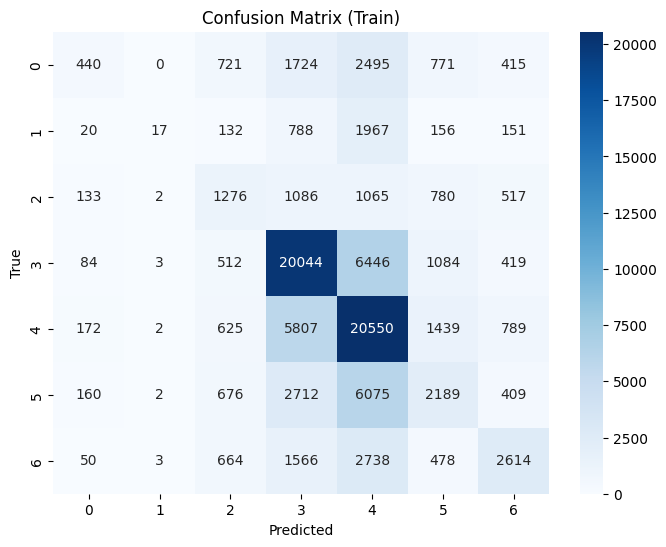

Confusion Matrix on Test:


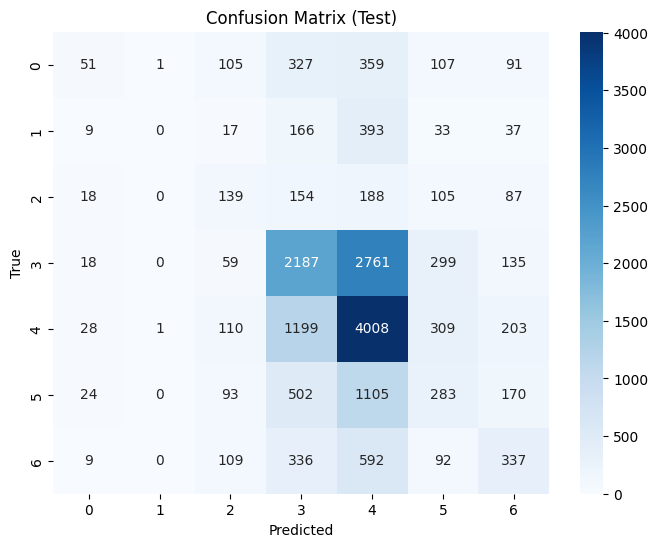


Classification Report on Train:
              precision    recall  f1-score   support

           0       0.42      0.07      0.12      6566
           1       0.59      0.01      0.01      3231
           2       0.28      0.26      0.27      4859
           3       0.59      0.70      0.64     28592
           4       0.50      0.70      0.58     29384
           5       0.32      0.18      0.23     12223
           6       0.49      0.32      0.39      8113

    accuracy                           0.51     92968
   macro avg       0.45      0.32      0.32     92968
weighted avg       0.49      0.51      0.47     92968


Classification Report on Test:
              precision    recall  f1-score   support

           0       0.32      0.05      0.09      1041
           1       0.00      0.00      0.00       655
           2       0.22      0.20      0.21       691
           3       0.45      0.40      0.42      5459
           4       0.43      0.68      0.53      5858
           5 

NameError: name 'test_features' is not defined

In [ ]:
torch.manual_seed(0)
model = neural_network(3*224*224, 128, 64, 10)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

loss_fn = torch.nn.CrossEntropyLoss()

training_loop(n_epochs=5, optimizer=optimizer, model=model, loss_fn=loss_fn, train_loader=train_loader_emotion)

test_with_metrics(model, train_loader_emotion, test_loader_emotion, num_classes=10)


In [ ]:
import matplotlib.pyplot as plt

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader):
    train_losses = []
    test_losses = []
    for epoch in range(n_epochs):
        model.train()
        loss_train = 0.0
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        avg_train_loss = loss_train / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        loss_test = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                loss_test += loss.item()

        avg_test_loss = loss_test / len(test_loader)
        test_losses.append(avg_test_loss)

        print(f'Epoch {epoch+1}/{n_epochs}, Training Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, n_epochs + 1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss over Epochs')
    plt.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import chain
import numpy as np

def test(model, train_loader, test_loader):
    model.eval()
    num_classes = 10
    lls = list(range(num_classes))
    predict_train = []
    predict_test = []
    labels_train = []
    labels_test = []
    probabilities_test = []

    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_train.extend(predicted.tolist())
            labels_train.extend(labels.tolist())

        for inputs, labels in test_loader:
            outputs = model(inputs)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, dim=1)
            predict_test.extend(predicted.tolist())
            labels_test.extend(labels.tolist())
            probabilities_test.extend(probabilities.cpu().numpy())

    cm_test = confusion_matrix(labels_test, predict_test, labels=lls)
    print("Confusion Matrix on Test Set:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=lls, yticklabels=lls)
    plt.title('Confusion Matrix on Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("\nClassification Report on Test Set:")
    print(classification_report(labels_test, predict_test, labels=lls))

    labels_binarized = label_binarize(labels_test, classes=lls)
    probabilities_test = np.array(probabilities_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(labels_binarized[:, i], probabilities_test[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Each Class')
    plt.legend(loc='lower right')
    plt.show()


Epoch 1/5, Training Loss: 1.6343, Test Loss: 1.6373
Epoch 2/5, Training Loss: 1.5046, Test Loss: 1.6056
Epoch 3/5, Training Loss: 1.4555, Test Loss: 1.5801
Epoch 4/5, Training Loss: 1.4174, Test Loss: 1.5770
Epoch 5/5, Training Loss: 1.3861, Test Loss: 1.5887


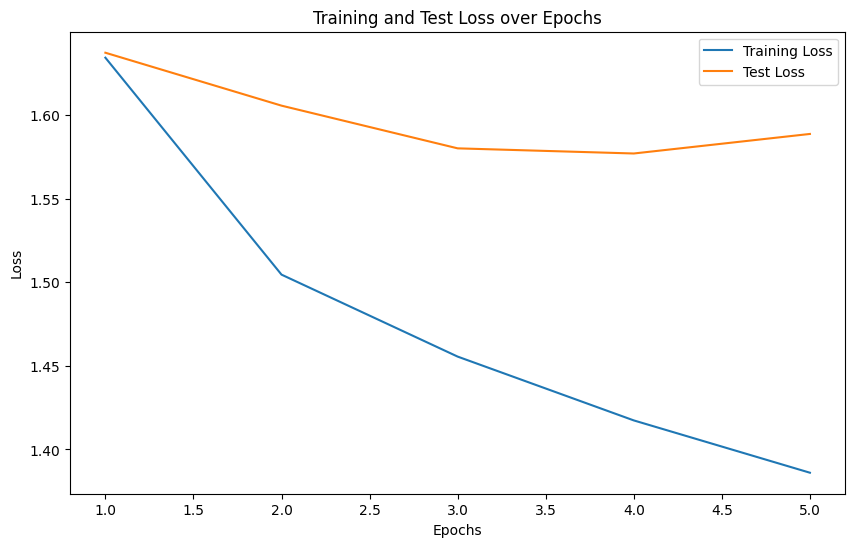

Confusion Matrix on Test Set:


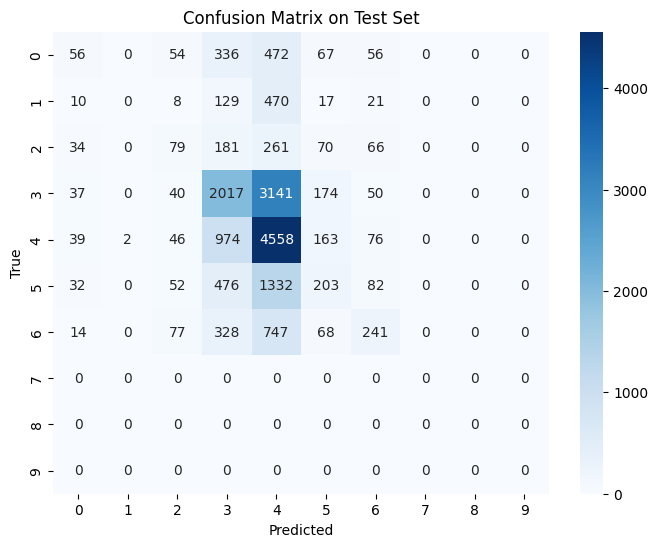


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.25      0.05      0.09      1041
           1       0.00      0.00      0.00       655
           2       0.22      0.11      0.15       691
           3       0.45      0.37      0.41      5459
           4       0.42      0.78      0.54      5858
           5       0.27      0.09      0.14      2177
           6       0.41      0.16      0.23      1475
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.41     17356
   macro avg       0.20      0.16      0.16     17356
weighted avg       0.37      0.41      0.36     17356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

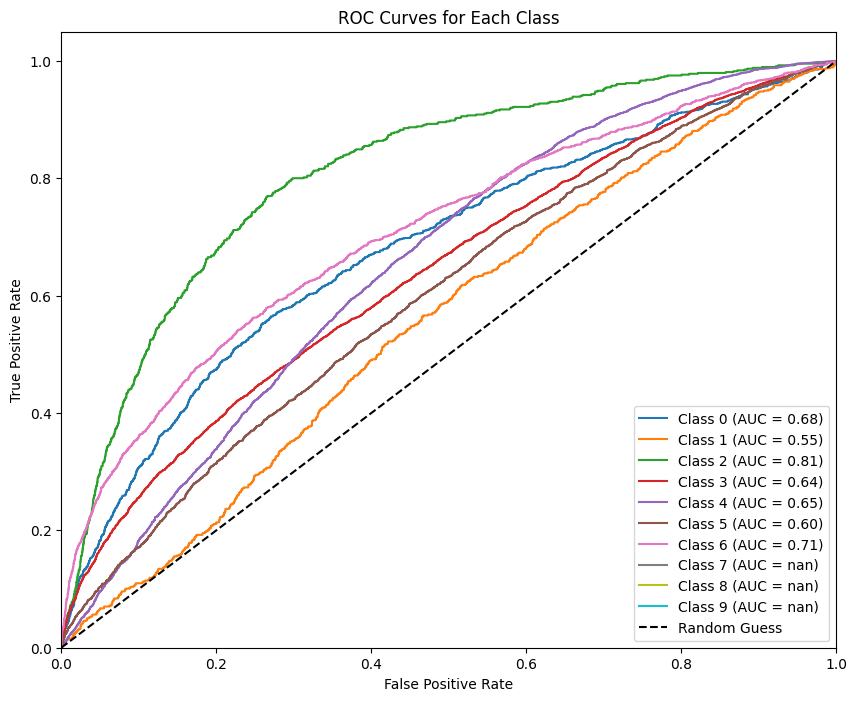

In [ ]:
class neural_network(nn.Module):
    def __init__(self, in_size, hidden_size1, hidden_size2, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, out_size)
        )

    def forward(self, x):
        x_reshape = x.view(x.shape[0], -1)
        out = self.network(x_reshape)
        return out

torch.manual_seed(0)
model = neural_network(3 * 224 * 224, 128, 64, 10)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_emotion,
    test_loader=test_loader_emotion
)


test(model, train_loader_emotion, test_loader_emotion)


In [ ]:
train_loader_emotion = torch.utils.data.DataLoader(train_emotion, batch_size=32, shuffle=True)
test_loader_emotion = torch.utils.data.DataLoader(test_emotion, batch_size=32, shuffle=False)


In [ ]:
class neural_network(nn.Module):
    def __init__(self, in_size, hidden_size1, hidden_size2, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, out_size)
        )

    def forward(self, x):
        x_reshape = x.view(x.shape[0], -1)
        out = self.network(x_reshape)
        return out

torch.manual_seed(0)
model = neural_network(3 * 224 * 224, 128, 64, 10)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=15,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_emotion,
    test_loader=test_loader_emotion
)

test(model, train_loader_emotion, test_loader_emotion)


Epoch 1/15, Training Loss: 1.6343, Test Loss: 1.6373
Epoch 2/15, Training Loss: 1.5046, Test Loss: 1.6056
Epoch 3/15, Training Loss: 1.4555, Test Loss: 1.5801
Epoch 4/15, Training Loss: 1.4174, Test Loss: 1.5770
Epoch 5/15, Training Loss: 1.3861, Test Loss: 1.5887
Epoch 6/15, Training Loss: 1.3661, Test Loss: 1.5891
Epoch 7/15, Training Loss: 1.3426, Test Loss: 1.5649
Epoch 8/15, Training Loss: 1.3216, Test Loss: 1.5595
Epoch 9/15, Training Loss: 1.3029, Test Loss: 1.5532
Epoch 10/15, Training Loss: 1.2864, Test Loss: 1.5811
Epoch 11/15, Training Loss: 1.2673, Test Loss: 1.5756
Epoch 12/15, Training Loss: 1.2508, Test Loss: 1.5771


# Best model

Epoch 1/15, Training Loss: 1.6343, Test Loss: 1.6373
Epoch 2/15, Training Loss: 1.5046, Test Loss: 1.6056
Epoch 3/15, Training Loss: 1.4555, Test Loss: 1.5801
Epoch 4/15, Training Loss: 1.4174, Test Loss: 1.5770
Epoch 5/15, Training Loss: 1.3861, Test Loss: 1.5887
Epoch 6/15, Training Loss: 1.3661, Test Loss: 1.5891
Epoch 7/15, Training Loss: 1.3426, Test Loss: 1.5649
Epoch 8/15, Training Loss: 1.3216, Test Loss: 1.5595
Epoch 9/15, Training Loss: 1.3029, Test Loss: 1.5532
Epoch 10/15, Training Loss: 1.2864, Test Loss: 1.5811
Epoch 11/15, Training Loss: 1.2673, Test Loss: 1.5756
Epoch 12/15, Training Loss: 1.2508, Test Loss: 1.5771
Epoch 13/15, Training Loss: 1.2344, Test Loss: 1.5925
Epoch 14/15, Training Loss: 1.2191, Test Loss: 1.6056
Epoch 15/15, Training Loss: 1.2021, Test Loss: 1.6111


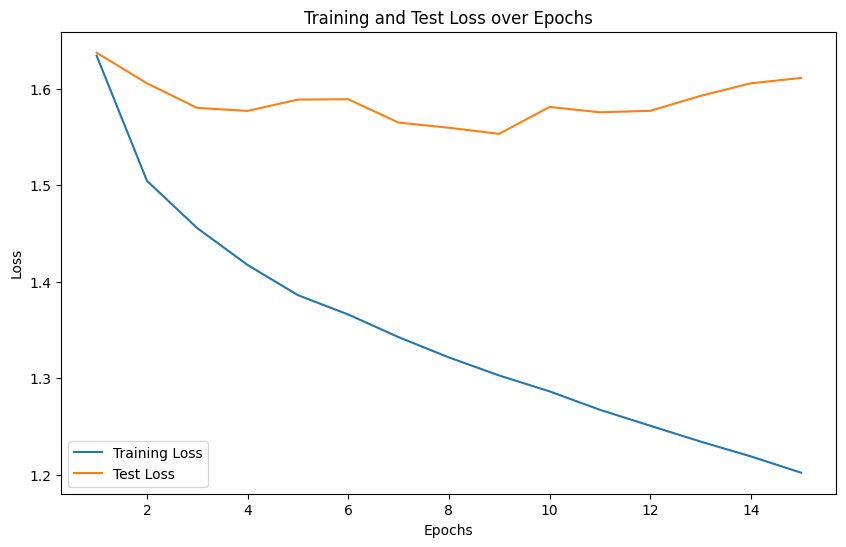

Confusion Matrix on Test Set:


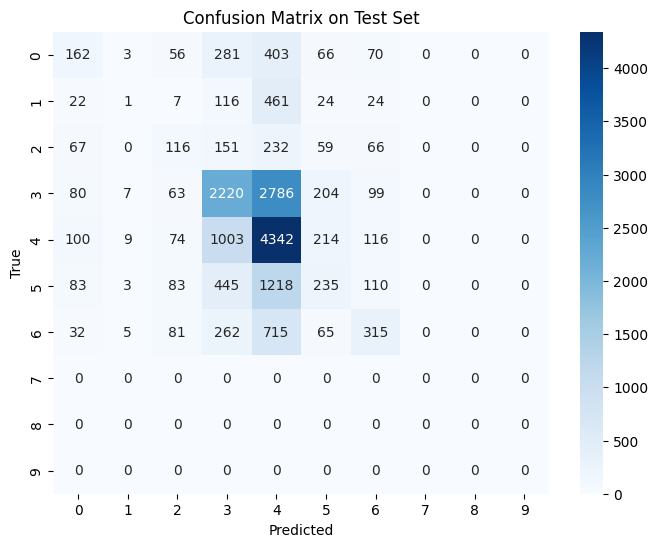


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.30      0.16      0.20      1041
           1       0.04      0.00      0.00       655
           2       0.24      0.17      0.20       691
           3       0.50      0.41      0.45      5459
           4       0.43      0.74      0.54      5858
           5       0.27      0.11      0.15      2177
           6       0.39      0.21      0.28      1475
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.43     17356
   macro avg       0.22      0.18      0.18     17356
weighted avg       0.40      0.43      0.39     17356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

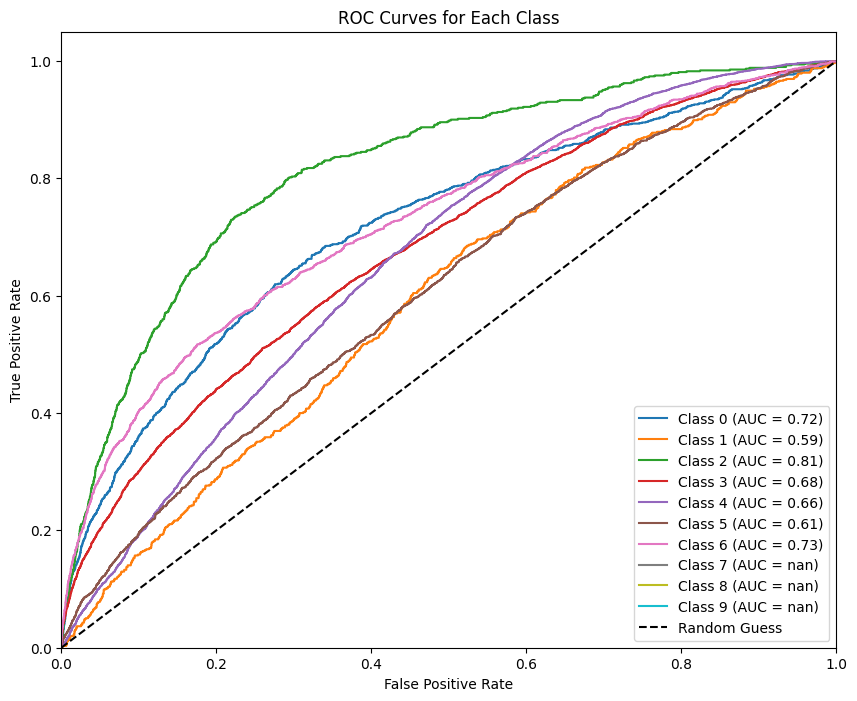

In [ ]:
class neural_network(nn.Module):
    def __init__(self, in_size, hidden_size1, hidden_size2, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, out_size)
        )

    def forward(self, x):
        x_reshape = x.view(x.shape[0], -1)
        out = self.network(x_reshape)
        return out

torch.manual_seed(0)
model = neural_network(3 * 224 * 224, 128, 64, 10)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=15,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_emotion,
    test_loader=test_loader_emotion
)

test(model, train_loader_emotion, test_loader_emotion)

# Running different iterayion models to find out if we can fint any model with good accuracy

Epoch 1/5, Training Loss: 1.6094, Test Loss: 1.6480
Epoch 2/5, Training Loss: 1.5076, Test Loss: 1.6104
Epoch 3/5, Training Loss: 1.4680, Test Loss: 1.5901
Epoch 4/5, Training Loss: 1.4346, Test Loss: 1.5817
Epoch 5/5, Training Loss: 1.4035, Test Loss: 1.5690


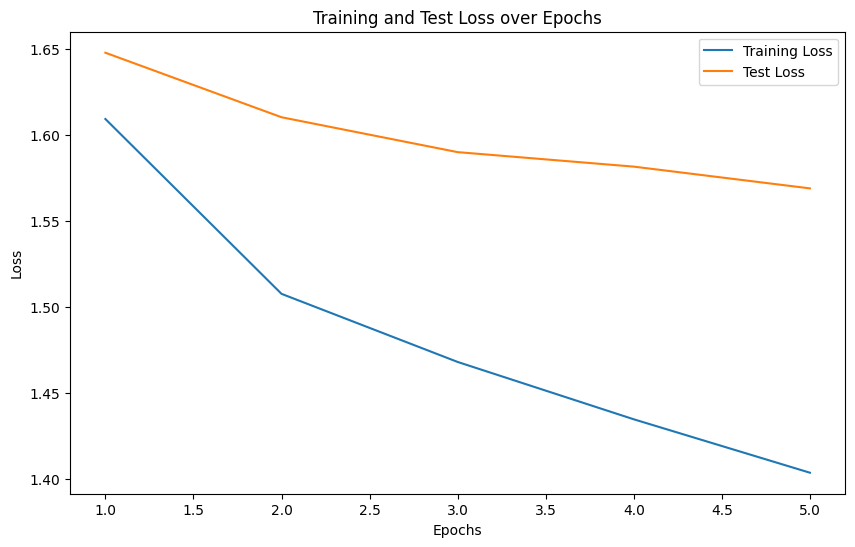

Confusion Matrix on Test Set:


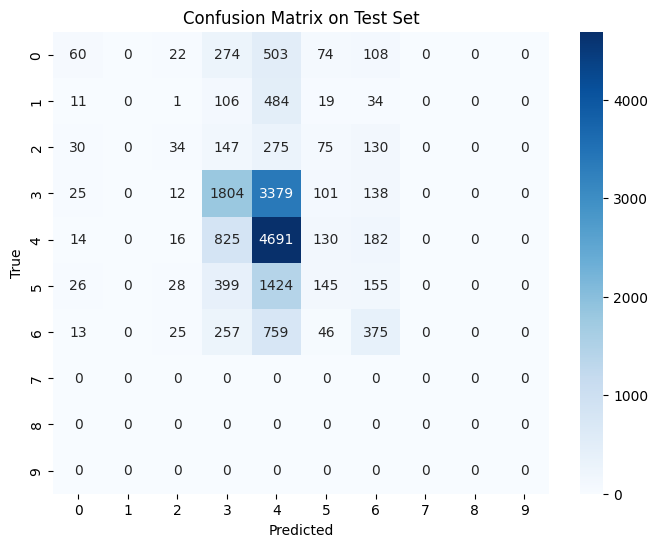


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.34      0.06      0.10      1041
           1       0.00      0.00      0.00       655
           2       0.25      0.05      0.08       691
           3       0.47      0.33      0.39      5459
           4       0.41      0.80      0.54      5858
           5       0.25      0.07      0.10      2177
           6       0.33      0.25      0.29      1475
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.41     17356
   macro avg       0.20      0.16      0.15     17356
weighted avg       0.38      0.41      0.35     17356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

IndexError: index 7 is out of bounds for axis 1 with size 7

In [ ]:
# Build a neural network on training data
class neural_network(nn.Module):
    def __init__(self, in_size, hidden_size1, hidden_size2, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, out_size)
        )

    def forward(self, x):
        x_reshape = x.view(x.shape[0], -1)
        out = self.network(x_reshape)
        return out

# Initialize model, optimizer, and loss function
torch.manual_seed(0)
model = neural_network(3 * 224 * 224, 128, 64, 10)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

# Train the model
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_emotion,
    test_loader=test_loader_emotion  # Pass test_loader to compute test loss
)

# Evaluate the model
test(model, train_loader_emotion, test_loader_emotion)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Define training loop
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader):
    train_losses = []
    test_losses = []
    for epoch in range(n_epochs):
        # Training Phase
        model.train()
        loss_train = 0.0
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate training loss
            loss_train += loss.item()

        # Calculate average training loss
        avg_train_loss = loss_train / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation Phase
        model.eval()
        loss_test = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                loss_test += loss.item()

        # Calculate average test loss
        avg_test_loss = loss_test / len(test_loader)
        test_losses.append(avg_test_loss)

        # Print losses for each epoch
        print(f'Epoch {epoch+1}/{n_epochs}, Training Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

    # Plot training and test loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, n_epochs + 1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss over Epochs')
    plt.legend()
    plt.show()

# Define evaluation function
def test(model, train_loader, test_loader):
    # Testing phase
    model.eval()
    num_classes = 7  # Changed to 7 classes
    classes = list(range(num_classes))
    predict_train = []
    predict_test = []
    labels_train = []
    labels_test = []
    probabilities_test = []

    with torch.no_grad():
        # Evaluate on training set
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_train.extend(predicted.tolist())
            labels_train.extend(labels.tolist())

        # Evaluate on test set
        for inputs, labels in test_loader:
            outputs = model(inputs)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, dim=1)
            predict_test.extend(predicted.tolist())
            labels_test.extend(labels.tolist())
            probabilities_test.extend(probabilities.cpu().numpy())

    # Confusion Matrix on Test Set
    cm_test = confusion_matrix(labels_test, predict_test, labels=classes)
    print("Confusion Matrix on Test Set:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix on Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report on Test Set
    print("\nClassification Report on Test Set:")
    print(classification_report(labels_test, predict_test, labels=classes))

    # ROC Curve and AUC for Test Set
    labels_binarized = label_binarize(labels_test, classes=classes)
    probabilities_test = np.array(probabilities_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(labels_binarized[:, i], probabilities_test[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Each Class')
    plt.legend(loc='lower right')
    plt.show()

# Define the neural network for 7 classes
class neural_network(nn.Module):
    def __init__(self, in_size, hidden_size1, hidden_size2, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, out_size)
        )

    def forward(self, x):
        x_reshape = x.view(x.shape[0], -1)
        out = self.network(x_reshape)
        return out

# Initialize model, optimizer, and loss function
torch.manual_seed(0)
model = neural_network(3 * 224 * 224, 128, 64, 7)  # Output changed to 7 classes
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

# Train the model
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_emotion,
    test_loader=test_loader_emotion  # Pass test_loader to compute test loss
)

# Evaluate the model
test(model, train_loader_emotion, test_loader_emotion)


Epoch 1/5, Training Loss: 1.6094, Test Loss: 1.6480
Epoch 2/5, Training Loss: 1.5076, Test Loss: 1.6104
Epoch 3/5, Training Loss: 1.4680, Test Loss: 1.5901


Epoch 1/5, Training Loss: 1.6094, Test Loss: 1.6480
Epoch 2/5, Training Loss: 1.5076, Test Loss: 1.6104
Epoch 3/5, Training Loss: 1.4680, Test Loss: 1.5901
Epoch 4/5, Training Loss: 1.4346, Test Loss: 1.5817
Epoch 5/5, Training Loss: 1.4035, Test Loss: 1.5690


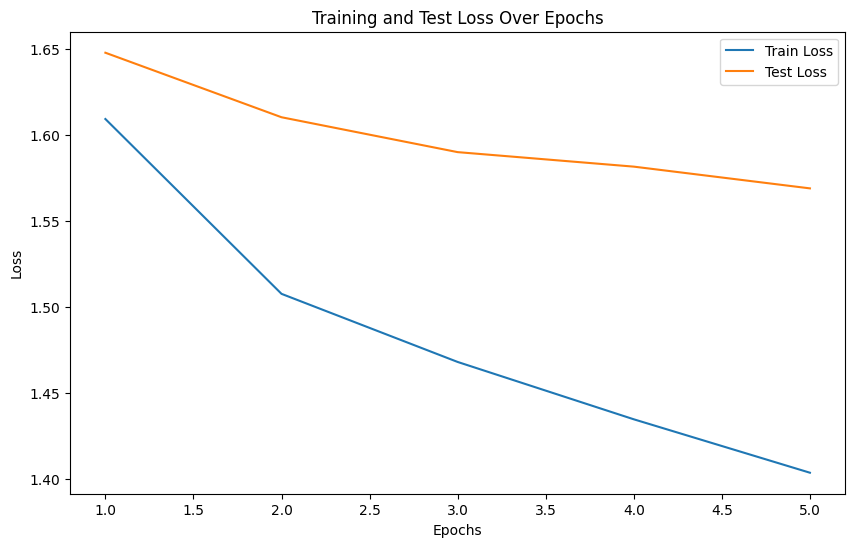

Confusion Matrix on Test Set:


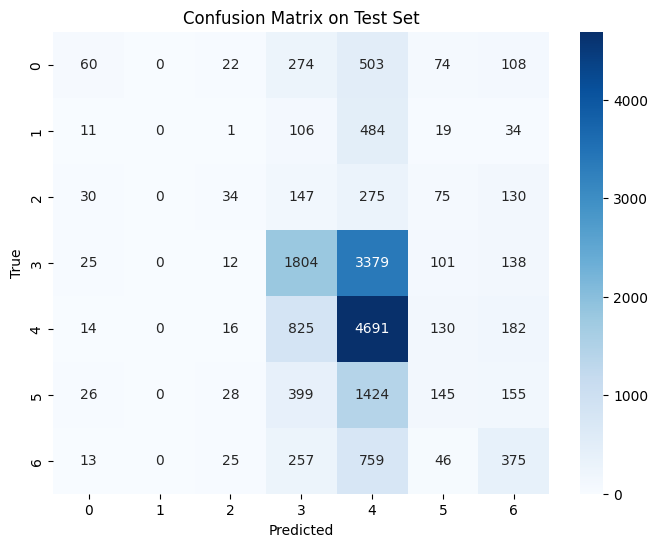


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.34      0.06      0.10      1041
           1       0.00      0.00      0.00       655
           2       0.25      0.05      0.08       691
           3       0.47      0.33      0.39      5459
           4       0.41      0.80      0.54      5858
           5       0.25      0.07      0.10      2177
           6       0.33      0.25      0.29      1475

    accuracy                           0.41     17356
   macro avg       0.29      0.22      0.21     17356
weighted avg       0.38      0.41      0.35     17356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


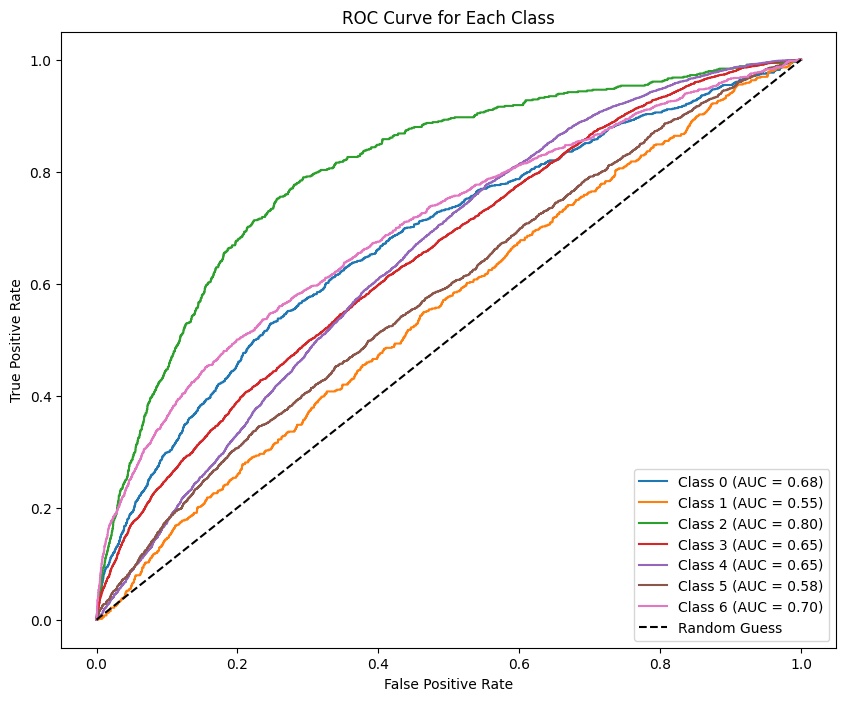

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader):
    train_losses = []
    test_losses = []

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        loss_train = 0.0
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        train_losses.append(loss_train / len(train_loader))

        # Validation phase
        model.eval()
        loss_test = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                loss_test += loss.item()

        test_losses.append(loss_test / len(test_loader))

        # Print training and testing loss for each epoch
        print(f'Epoch {epoch + 1}/{n_epochs}, Training Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

    # Plot training and test loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, n_epochs + 1), test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Test Loss Over Epochs")
    plt.legend()
    plt.show()


def test(model, train_loader, test_loader, num_classes=7):
    model.eval()
    lls = list(range(num_classes))
    predict_test, predict_train = [], []
    labels_test, labels_train = [], []
    probabilities_test = []

    with torch.no_grad():
        # Evaluate on training data
        for inputs, labels in train_loader:
            outputs = model(inputs)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, dim=1)
            predict_train.extend(predicted.tolist())
            labels_train.extend(labels.tolist())

        # Evaluate on test data
        for inputs, labels in test_loader:
            outputs = model(inputs)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, dim=1)
            predict_test.extend(predicted.tolist())
            labels_test.extend(labels.tolist())
            probabilities_test.extend(probabilities.cpu().numpy())

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(labels_test, predict_test, labels=lls)
    print("Confusion Matrix on Test Set:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=lls, yticklabels=lls)
    plt.title("Confusion Matrix on Test Set")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Classification Report
    print("\nClassification Report on Test Set:")
    print(classification_report(labels_test, predict_test, labels=lls))

    # ROC Curve and AUC
    labels_binarized = label_binarize(labels_test, classes=lls)
    probabilities_test = np.array(probabilities_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(labels_binarized[:, i], probabilities_test[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Each Class")
    plt.legend(loc="lower right")
    plt.show()


# Data Loaders
train_loader_emotion = torch.utils.data.DataLoader(train_emotion, batch_size=32, shuffle=True)
test_loader_emotion = torch.utils.data.DataLoader(test_emotion, batch_size=32, shuffle=False)


# Define the Neural Network
class neural_network(nn.Module):
    def __init__(self, in_size, hidden_size1, hidden_size2, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, out_size)
        )

    def forward(self, x):
        x_reshape = x.view(x.shape[0], -1)
        out = self.network(x_reshape)
        return out.squeeze()


# Model Initialization
torch.manual_seed(0)
model = neural_network(3 * 224 * 224, 128, 64, 7)  # Adjusted output size to 7 classes
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

# Training
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_emotion,
    test_loader=test_loader_emotion
)

# Testing with Metrics
test(model, train_loader_emotion, test_loader_emotion, num_classes=7)


Epoch 1/5, Training Loss: -9104435.9761, Test Loss: -34137832.0506
Epoch 2/5, Training Loss: -103477001.2498, Test Loss: -203673621.3794
Epoch 3/5, Training Loss: -358497827.3999, Test Loss: -560178058.1215
Epoch 4/5, Training Loss: -820666502.5134, Test Loss: -1152035852.9503
Epoch 5/5, Training Loss: -1536376486.9924, Test Loss: -2025491772.5525


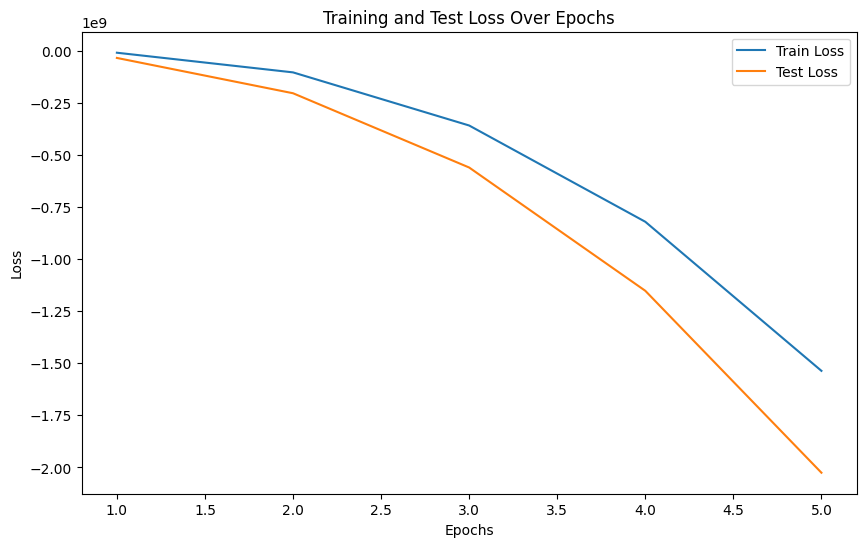

Confusion Matrix on Test Set:


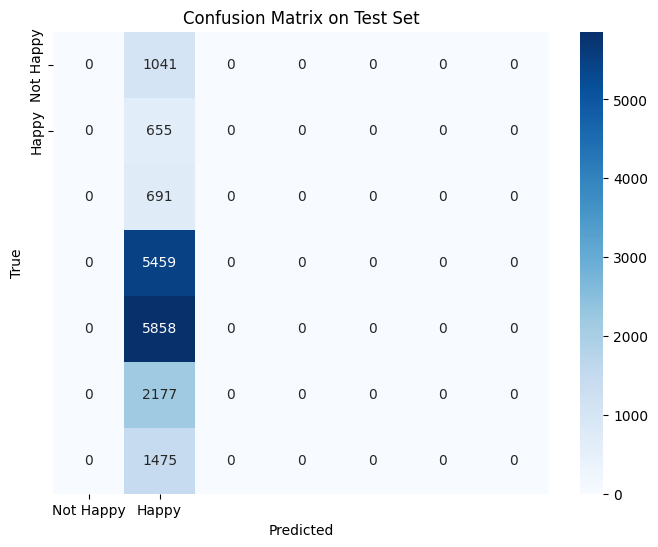


Classification Report on Test Set:


ValueError: Number of classes, 7, does not match size of target_names, 2. Try specifying the labels parameter

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Define transformations
emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load datasets
train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)

# Specify the index of the "Happy" class (adjust based on your dataset)
happy_class_index = train_emotion.class_to_idx["happy"]

# Convert labels: 1 for Happy, 0 for all other classes
train_emotion.targets = [1 if label == happy_class_index else 0 for label in train_emotion.targets]
test_emotion.targets = [1 if label == happy_class_index else 0 for label in test_emotion.targets]

# Data Loaders
train_loader_emotion = DataLoader(train_emotion, batch_size=32, shuffle=True)
test_loader_emotion = DataLoader(test_emotion, batch_size=32, shuffle=False)

# Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self, in_size, hidden_size1, hidden_size2):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, 1)  # Single output for binary classification
        )

    def forward(self, x):
        x_reshape = x.view(x.shape[0], -1)  # Flatten the image
        out = self.network(x_reshape)
        return out

# Initialize the model, optimizer, and loss function
torch.manual_seed(0)
model = NeuralNetwork(3 * 224 * 224, 128, 64)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss

# Training Loop
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader):
    train_losses = []
    test_losses = []

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        loss_train = 0.0
        for inputs, labels in train_loader:
            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, labels.float())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        train_losses.append(loss_train / len(train_loader))

        # Validation phase
        model.eval()
        loss_test = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs).squeeze()
                loss = loss_fn(outputs, labels.float())
                loss_test += loss.item()

        test_losses.append(loss_test / len(test_loader))

        # Print training and testing loss for each epoch
        print(f'Epoch {epoch + 1}/{n_epochs}, Training Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

    # Plot training and test loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, n_epochs + 1), test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Test Loss Over Epochs")
    plt.legend()
    plt.show()

# Testing Function
def test(model, train_loader, test_loader):
    model.eval()
    predict_test, predict_train = [], []
    labels_test, labels_train = [], []
    probabilities_test = []

    with torch.no_grad():
        # Evaluate on training data
        for inputs, labels in train_loader:
            outputs = torch.sigmoid(model(inputs).squeeze())
            predicted = (outputs > 0.5).int()
            predict_train.extend(predicted.tolist())
            labels_train.extend(labels.tolist())

        # Evaluate on test data
        for inputs, labels in test_loader:
            outputs = torch.sigmoid(model(inputs).squeeze())
            predicted = (outputs > 0.5).int()
            predict_test.extend(predicted.tolist())
            labels_test.extend(labels.tolist())
            probabilities_test.extend(outputs.cpu().numpy())

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(labels_test, predict_test)
    print("Confusion Matrix on Test Set:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Happy", "Happy"], yticklabels=["Not Happy", "Happy"])
    plt.title("Confusion Matrix on Test Set")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Classification Report
    print("\nClassification Report on Test Set:")
    print(classification_report(labels_test, predict_test, target_names=["Not Happy", "Happy"]))

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(labels_test, probabilities_test)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Training
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_emotion,
    test_loader=test_loader_emotion
)

# Testing with Metrics
test(model, train_loader_emotion, test_loader_emotion)


Epoch 1/5, Training Loss: -9104435.9761, Test Loss: -34137832.0506
Epoch 2/5, Training Loss: -103477001.2498, Test Loss: -203673621.3794
Epoch 3/5, Training Loss: -358497827.3999, Test Loss: -560178058.1215
Epoch 4/5, Training Loss: -820666502.5134, Test Loss: -1152035852.9503
Epoch 5/5, Training Loss: -1536376486.9924, Test Loss: -2025491772.5525


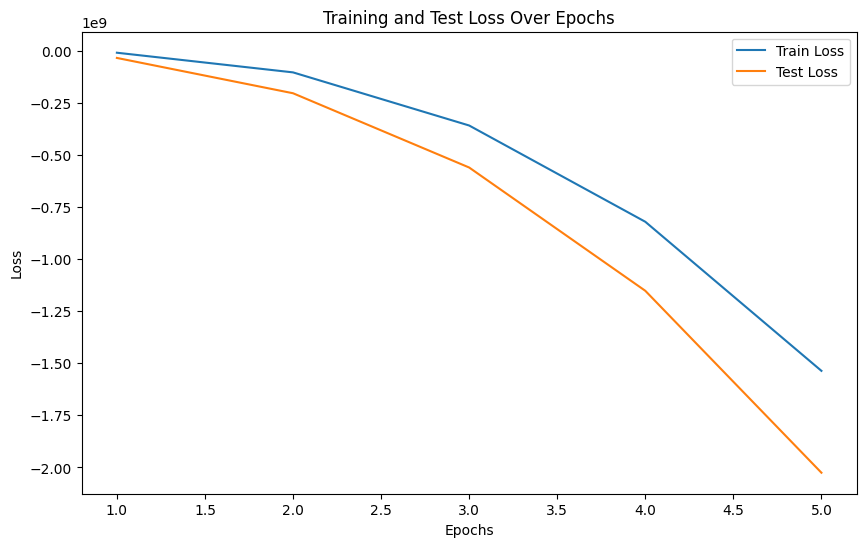

Confusion Matrix on Test Set:


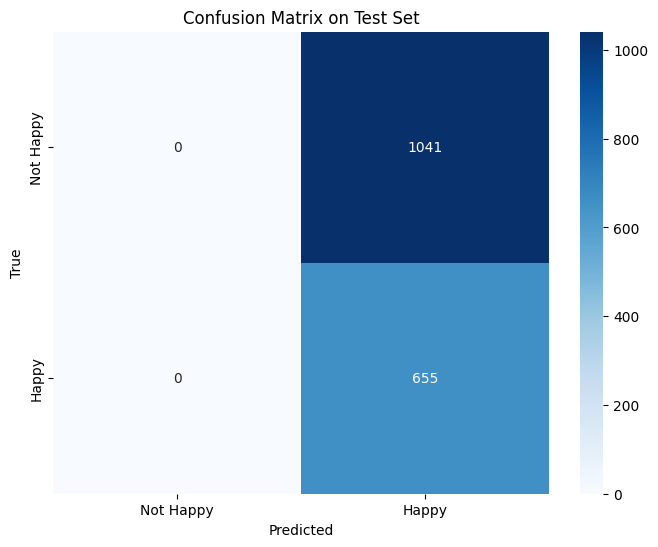


Classification Report on Test Set:
              precision    recall  f1-score   support

   Not Happy       0.00      0.00      0.00      1041
       Happy       0.04      1.00      0.07       655

   micro avg       0.04      0.39      0.07      1696
   macro avg       0.02      0.50      0.04      1696
weighted avg       0.01      0.39      0.03      1696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multiclass format is not supported

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np

# Define transformations
emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load datasets
train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)

# Specify the index of the "Happy" class
happy_class_index = train_emotion.class_to_idx["happy"]

# Convert labels: 1 for Happy, 0 for all other classes
train_emotion.targets = [1 if label == happy_class_index else 0 for label in train_emotion.targets]
test_emotion.targets = [1 if label == happy_class_index else 0 for label in test_emotion.targets]

# Data Loaders
train_loader_emotion = DataLoader(train_emotion, batch_size=32, shuffle=True)
test_loader_emotion = DataLoader(test_emotion, batch_size=32, shuffle=False)

# Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self, in_size, hidden_size1, hidden_size2):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, 1)  # Single output for binary classification
        )

    def forward(self, x):
        x_reshape = x.view(x.shape[0], -1)  # Flatten the image
        out = self.network(x_reshape)
        return out

# Initialize the model, optimizer, and loss function
torch.manual_seed(0)
model = NeuralNetwork(3 * 224 * 224, 128, 64)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss

# Training Loop
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader):
    train_losses = []
    test_losses = []

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        loss_train = 0.0
        for inputs, labels in train_loader:
            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, labels.float())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        train_losses.append(loss_train / len(train_loader))

        # Validation phase
        model.eval()
        loss_test = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs).squeeze()
                loss = loss_fn(outputs, labels.float())
                loss_test += loss.item()

        test_losses.append(loss_test / len(test_loader))

        # Print training and testing loss for each epoch
        print(f'Epoch {epoch + 1}/{n_epochs}, Training Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

    # Plot training and test loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, n_epochs + 1), test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Test Loss Over Epochs")
    plt.legend()
    plt.show()

# Testing Function
def test(model, train_loader, test_loader):
    model.eval()
    predict_test, predict_train = [], []
    labels_test, labels_train = [], []
    probabilities_test = []

    with torch.no_grad():
        # Evaluate on training data
        for inputs, labels in train_loader:
            outputs = torch.sigmoid(model(inputs).squeeze())
            predicted = (outputs > 0.5).int()
            predict_train.extend(predicted.tolist())
            labels_train.extend(labels.tolist())

        # Evaluate on test data
        for inputs, labels in test_loader:
            outputs = torch.sigmoid(model(inputs).squeeze())
            predicted = (outputs > 0.5).int()
            predict_test.extend(predicted.tolist())
            labels_test.extend(labels.tolist())
            probabilities_test.extend(outputs.cpu().numpy())

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(labels_test, predict_test, labels=[0, 1])
    print("Confusion Matrix on Test Set:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Happy", "Happy"], yticklabels=["Not Happy", "Happy"])
    plt.title("Confusion Matrix on Test Set")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Classification Report
    print("\nClassification Report on Test Set:")
    print(classification_report(labels_test, predict_test, labels=[0, 1], target_names=["Not Happy", "Happy"]))

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(labels_test, probabilities_test)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Training
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_emotion,
    test_loader=test_loader_emotion
)

# Testing with Metrics
test(model, train_loader_emotion, test_loader_emotion)


# After testing difffernt models the intial model worked bette